<a href="https://colab.research.google.com/github/Sohail1173/Human_Mood_detection/blob/main/Human_Mood_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('user uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))

Saving archive (1).zip to archive (1).zip
user uploaded file "archive (1).zip" with length 68327503 bytes


In [ ]:
from zipfile import ZipFile
file_name = "archive (1).zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import cv2 as cv
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,RMSprop



import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Class_name=os.listdir("/content/train")
Class_name

['disgusted', 'sad', 'neutral', 'fearful', 'surprised', 'happy', 'angry']

                         ********************************sad*************************


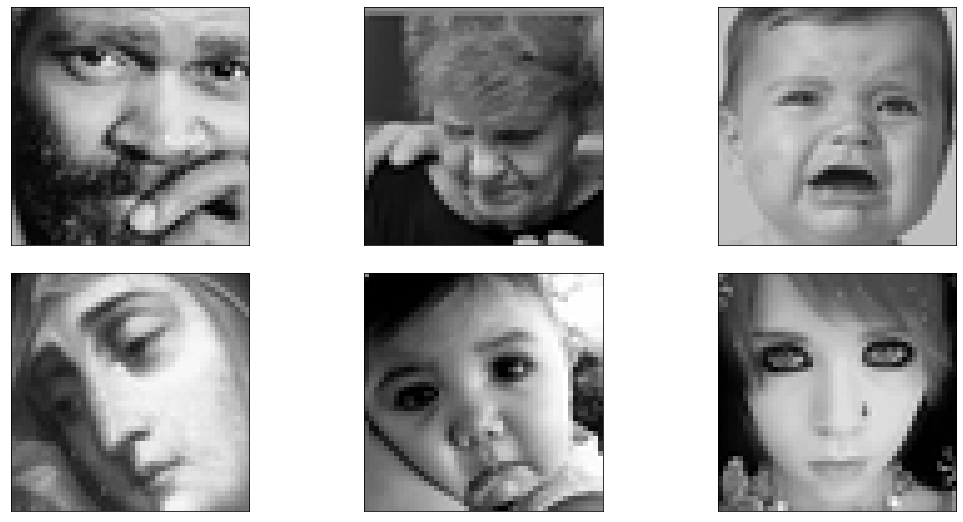

In [ ]:
plt.figure(figsize=(15,11))
path = f"/content/train/{Class_name[1]}"
print(f"                         ********************************{Class_name[1]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

                         ********************************neutral*************************


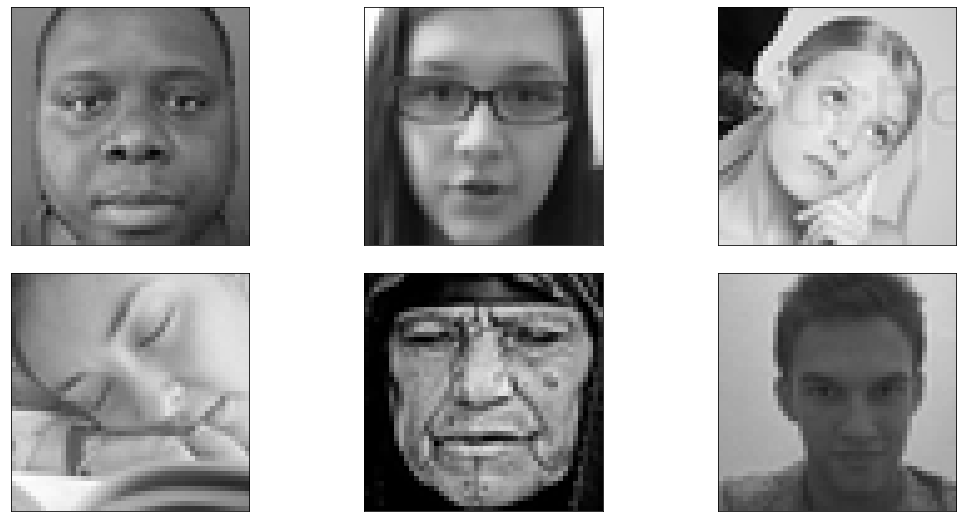

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(15,11))
path = f"/content/train/{Class_name[2]}"
print(f"                         ********************************{Class_name[2]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

In [ ]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
opt = Adam(lr = 0.0001)
emotion_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

emotion_model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history = emotion_model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = train_generator,
                                validation_steps = train_generator.n//train_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48
446/448 [============================>.] - ETA: 0s - loss: 1.7453 - accuracy: 0.2902

448/448 [==============================] - 27s 40ms/step - loss: 1.7445 - accuracy: 0.2908 - val_loss: 1.5646 - val_accuracy: 0.3936 - lr: 0.0010
Epoch 2/48
448/448 [==============================] - ETA: 0s - loss: 1.5044 - accuracy: 0.4182

448/448 [==============================] - 20s 44ms/step - loss: 1.5044 - accuracy: 0.4182 - val_loss: 1.3600 - val_accuracy: 0.4816 - lr: 0.0010
Epoch 3/48
446/448 [============================>.] - ETA: 0s - loss: 1.3478 - accuracy: 0.4883

448/448 [==============================] - 20s 45ms/step - loss: 1.3476 - accuracy: 0.4882 - val_loss: 1.1936 - val_accuracy: 0.5457 - lr: 0.0010
Epoch 4/48
447/448 [============================>.] - ETA: 0s - loss: 1.2532 - accuracy: 0.5212

448/448 [==============================] - 18s 39ms/step - loss: 1.2533 - accuracy: 0.5210 - val_loss: 1.1401 - val_accuracy: 0.5854 - lr: 0.0010
Epoch 5/48
446/448 [============================>.] - ETA: 0s - loss: 1.1948 - accuracy: 0.5442

448/448 [==============================] - 18s 40ms/step - loss: 1.1943 - accuracy: 0.5444 - val_loss: 1.0426 - val_accuracy: 0.6086 - lr: 0.0010
Epoch 6/48
448/448 [==============================] - ETA: 0s - loss: 1.1484 - accuracy: 0.5654

448/448 [==============================] - 18s 39ms/step - loss: 1.1484 - accuracy: 0.5654 - val_loss: 0.9987 - val_accuracy: 0.6296 - lr: 0.0010
Epoch 7/48
448/448 [==============================] - ETA: 0s - loss: 1.1052 - accuracy: 0.5842

448/448 [==============================] - 18s 40ms/step - loss: 1.1052 - accuracy: 0.5842 - val_loss: 0.9403 - val_accuracy: 0.6545 - lr: 0.0010
Epoch 8/48
446/448 [============================>.] - ETA: 0s - loss: 1.0690 - accuracy: 0.5984

448/448 [==============================] - 19s 42ms/step - loss: 1.0693 - accuracy: 0.5983 - val_loss: 0.9032 - val_accuracy: 0.6703 - lr: 0.0010
Epoch 9/48
446/448 [============================>.] - ETA: 0s - loss: 1.0299 - accuracy: 0.6117

448/448 [==============================] - 17s 39ms/step - loss: 1.0299 - accuracy: 0.6119 - val_loss: 0.8539 - val_accuracy: 0.6925 - lr: 0.0010
Epoch 10/48
448/448 [==============================] - ETA: 0s - loss: 0.9903 - accuracy: 0.6280

448/448 [==============================] - 20s 45ms/step - loss: 0.9903 - accuracy: 0.6280 - val_loss: 0.8322 - val_accuracy: 0.7177 - lr: 0.0010
Epoch 11/48
447/448 [============================>.] - ETA: 0s - loss: 0.9574 - accuracy: 0.6405

448/448 [==============================] - 18s 40ms/step - loss: 0.9574 - accuracy: 0.6405 - val_loss: 0.7820 - val_accuracy: 0.7353 - lr: 0.0010
Epoch 12/48
448/448 [==============================] - ETA: 0s - loss: 0.9265 - accuracy: 0.6517

448/448 [==============================] - 20s 44ms/step - loss: 0.9265 - accuracy: 0.6517 - val_loss: 0.7470 - val_accuracy: 0.7518 - lr: 0.0010
Epoch 13/48
446/448 [============================>.] - ETA: 0s - loss: 0.8957 - accuracy: 0.6650

448/448 [==============================] - 18s 40ms/step - loss: 0.8966 - accuracy: 0.6648 - val_loss: 0.6655 - val_accuracy: 0.7786 - lr: 0.0010
Epoch 14/48
448/448 [==============================] - ETA: 0s - loss: 0.8637 - accuracy: 0.6772

448/448 [==============================] - 18s 39ms/step - loss: 0.8637 - accuracy: 0.6772 - val_loss: 0.6535 - val_accuracy: 0.7970 - lr: 0.0010
Epoch 15/48
446/448 [============================>.] - ETA: 0s - loss: 0.8384 - accuracy: 0.6870

448/448 [==============================] - 20s 45ms/step - loss: 0.8387 - accuracy: 0.6869 - val_loss: 0.5876 - val_accuracy: 0.8030 - lr: 0.0010
Epoch 16/48
448/448 [==============================] - ETA: 0s - loss: 0.8037 - accuracy: 0.7027

448/448 [==============================] - 18s 40ms/step - loss: 0.8037 - accuracy: 0.7027 - val_loss: 0.5741 - val_accuracy: 0.8290 - lr: 0.0010
Epoch 17/48
447/448 [============================>.] - ETA: 0s - loss: 0.7759 - accuracy: 0.7116

448/448 [==============================] - 20s 45ms/step - loss: 0.7760 - accuracy: 0.7116 - val_loss: 0.4990 - val_accuracy: 0.8466 - lr: 0.0010
Epoch 18/48
447/448 [============================>.] - ETA: 0s - loss: 0.7601 - accuracy: 0.7195

448/448 [==============================] - 18s 41ms/step - loss: 0.7600 - accuracy: 0.7196 - val_loss: 0.5094 - val_accuracy: 0.8607 - lr: 0.0010
Epoch 19/48
448/448 [==============================] - ETA: 0s - loss: 0.7256 - accuracy: 0.7291

448/448 [==============================] - 18s 39ms/step - loss: 0.7256 - accuracy: 0.7291 - val_loss: 0.4723 - val_accuracy: 0.8825 - lr: 0.0010
Epoch 20/48
448/448 [==============================] - ETA: 0s - loss: 0.7095 - accuracy: 0.7353

448/448 [==============================] - 18s 39ms/step - loss: 0.7095 - accuracy: 0.7353 - val_loss: 0.4572 - val_accuracy: 0.8809 - lr: 0.0010
Epoch 21/48
446/448 [============================>.] - ETA: 0s - loss: 0.6957 - accuracy: 0.7402

448/448 [==============================] - 17s 39ms/step - loss: 0.6956 - accuracy: 0.7403 - val_loss: 0.4126 - val_accuracy: 0.8925 - lr: 0.0010
Epoch 22/48
448/448 [==============================] - ETA: 0s - loss: 0.6776 - accuracy: 0.7503

448/448 [==============================] - 17s 39ms/step - loss: 0.6776 - accuracy: 0.7503 - val_loss: 0.3903 - val_accuracy: 0.9033 - lr: 0.0010
Epoch 23/48
446/448 [============================>.] - ETA: 0s - loss: 0.6535 - accuracy: 0.7589

448/448 [==============================] - 18s 40ms/step - loss: 0.6536 - accuracy: 0.7591 - val_loss: 0.3485 - val_accuracy: 0.9189 - lr: 0.0010
Epoch 24/48
448/448 [==============================] - ETA: 0s - loss: 0.6310 - accuracy: 0.7642

448/448 [==============================] - 20s 46ms/step - loss: 0.6310 - accuracy: 0.7642 - val_loss: 0.3304 - val_accuracy: 0.9212 - lr: 0.0010
Epoch 25/48
446/448 [============================>.] - ETA: 0s - loss: 0.6331 - accuracy: 0.7637

448/448 [==============================] - 18s 39ms/step - loss: 0.6337 - accuracy: 0.7635 - val_loss: 0.3315 - val_accuracy: 0.9179 - lr: 0.0010
Epoch 26/48
447/448 [============================>.] - ETA: 0s - loss: 0.6056 - accuracy: 0.7782

448/448 [==============================] - 19s 42ms/step - loss: 0.6059 - accuracy: 0.7781 - val_loss: 0.3127 - val_accuracy: 0.9364 - lr: 0.0010
Epoch 27/48
448/448 [==============================] - ETA: 0s - loss: 0.5821 - accuracy: 0.7835

448/448 [==============================] - 18s 40ms/step - loss: 0.5821 - accuracy: 0.7835 - val_loss: 0.2915 - val_accuracy: 0.9370 - lr: 0.0010
Epoch 28/48
448/448 [==============================] - ETA: 0s - loss: 0.5780 - accuracy: 0.7886

448/448 [==============================] - 18s 40ms/step - loss: 0.5780 - accuracy: 0.7886 - val_loss: 0.2770 - val_accuracy: 0.9442 - lr: 0.0010
Epoch 29/48
448/448 [==============================] - ETA: 0s - loss: 0.5720 - accuracy: 0.7901

448/448 [==============================] - 20s 45ms/step - loss: 0.5720 - accuracy: 0.7901 - val_loss: 0.2733 - val_accuracy: 0.9457 - lr: 0.0010
Epoch 30/48
447/448 [============================>.] - ETA: 0s - loss: 0.5569 - accuracy: 0.7949

448/448 [==============================] - 18s 39ms/step - loss: 0.5568 - accuracy: 0.7949 - val_loss: 0.2596 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 31/48
446/448 [============================>.] - ETA: 0s - loss: 0.5544 - accuracy: 0.7951

448/448 [==============================] - 18s 40ms/step - loss: 0.5538 - accuracy: 0.7953 - val_loss: 0.2500 - val_accuracy: 0.9532 - lr: 0.0010
Epoch 32/48
447/448 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.8005

448/448 [==============================] - 20s 45ms/step - loss: 0.5424 - accuracy: 0.8005 - val_loss: 0.2401 - val_accuracy: 0.9568 - lr: 0.0010
Epoch 33/48
446/448 [============================>.] - ETA: 0s - loss: 0.5387 - accuracy: 0.8043

448/448 [==============================] - 18s 39ms/step - loss: 0.5383 - accuracy: 0.8045 - val_loss: 0.2427 - val_accuracy: 0.9548 - lr: 0.0010
Epoch 34/48
448/448 [==============================] - ETA: 0s - loss: 0.5131 - accuracy: 0.8117

448/448 [==============================] - 18s 40ms/step - loss: 0.5131 - accuracy: 0.8117 - val_loss: 0.2368 - val_accuracy: 0.9585 - lr: 0.0010
Epoch 35/48
448/448 [==============================] - ETA: 0s - loss: 0.5112 - accuracy: 0.8138

448/448 [==============================] - 18s 40ms/step - loss: 0.5112 - accuracy: 0.8138 - val_loss: 0.1986 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 36/48
446/448 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.8193

448/448 [==============================] - 20s 45ms/step - loss: 0.5009 - accuracy: 0.8190 - val_loss: 0.2036 - val_accuracy: 0.9656 - lr: 0.0010
Epoch 37/48
447/448 [============================>.] - ETA: 0s - loss: 0.4920 - accuracy: 0.8216

448/448 [==============================] - 18s 41ms/step - loss: 0.4921 - accuracy: 0.8214 - val_loss: 0.1905 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 38/48
448/448 [==============================] - ETA: 0s - loss: 0.4873 - accuracy: 0.8231

448/448 [==============================] - 20s 45ms/step - loss: 0.4873 - accuracy: 0.8231 - val_loss: 0.1872 - val_accuracy: 0.9663 - lr: 0.0010
Epoch 39/48
448/448 [==============================] - ETA: 0s - loss: 0.4785 - accuracy: 0.8274

448/448 [==============================] - 18s 40ms/step - loss: 0.4785 - accuracy: 0.8274 - val_loss: 0.1752 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 40/48
447/448 [============================>.] - ETA: 0s - loss: 0.4750 - accuracy: 0.8259

448/448 [==============================] - 19s 42ms/step - loss: 0.4750 - accuracy: 0.8259 - val_loss: 0.1779 - val_accuracy: 0.9723 - lr: 0.0010
Epoch 41/48
446/448 [============================>.] - ETA: 0s - loss: 0.4555 - accuracy: 0.8355

448/448 [==============================] - 18s 40ms/step - loss: 0.4550 - accuracy: 0.8356 - val_loss: 0.1562 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 42/48
446/448 [============================>.] - ETA: 0s - loss: 0.4608 - accuracy: 0.8320

448/448 [==============================] - 18s 39ms/step - loss: 0.4609 - accuracy: 0.8320 - val_loss: 0.1634 - val_accuracy: 0.9749 - lr: 0.0010
Epoch 43/48
448/448 [==============================] - ETA: 0s - loss: 0.4636 - accuracy: 0.8305

448/448 [==============================] - 20s 45ms/step - loss: 0.4636 - accuracy: 0.8305 - val_loss: 0.1533 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 44/48
446/448 [============================>.] - ETA: 0s - loss: 0.4484 - accuracy: 0.8388

448/448 [==============================] - 20s 45ms/step - loss: 0.4481 - accuracy: 0.8388 - val_loss: 0.1514 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 45/48
446/448 [============================>.] - ETA: 0s - loss: 0.4469 - accuracy: 0.8356

448/448 [==============================] - 18s 40ms/step - loss: 0.4465 - accuracy: 0.8357 - val_loss: 0.1402 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 46/48
446/448 [============================>.] - ETA: 0s - loss: 0.4356 - accuracy: 0.8432

448/448 [==============================] - 18s 40ms/step - loss: 0.4353 - accuracy: 0.8433 - val_loss: 0.1346 - val_accuracy: 0.9821 - lr: 0.0010
Epoch 47/48
447/448 [============================>.] - ETA: 0s - loss: 0.4336 - accuracy: 0.8438

448/448 [==============================] - 20s 46ms/step - loss: 0.4338 - accuracy: 0.8437 - val_loss: 0.1321 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 48/48
446/448 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.8470

448/448 [==============================] - 19s 42ms/step - loss: 0.4279 - accuracy: 0.8469 - val_loss: 0.1280 - val_accuracy: 0.9829 - lr: 0.0010


In [ ]:
#Saving the model
emotion_model.save('model.h5')

In [ ]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [ ]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


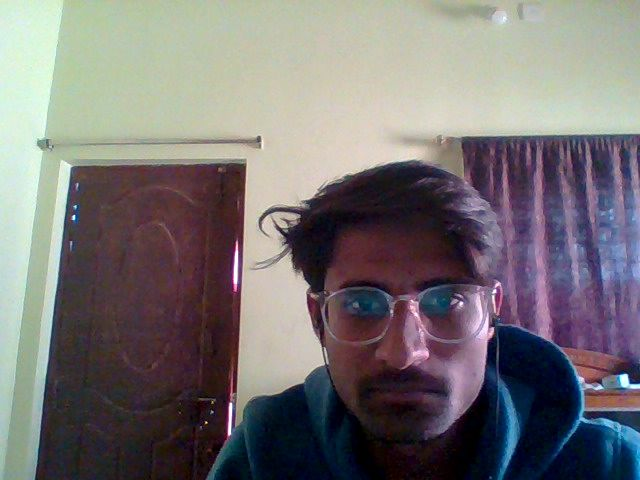

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

OpenCV(4.6.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

1/1 [==============================] - 0s 201ms/step


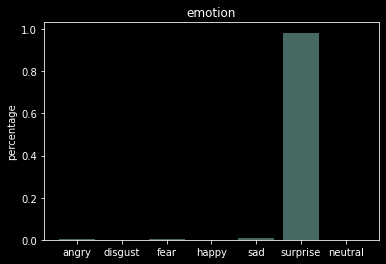

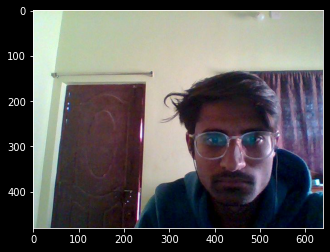

In [ ]:
import cv2
            
def facecrop(image):  
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('photo.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop('photo.jpg')

#Testing a file.
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()

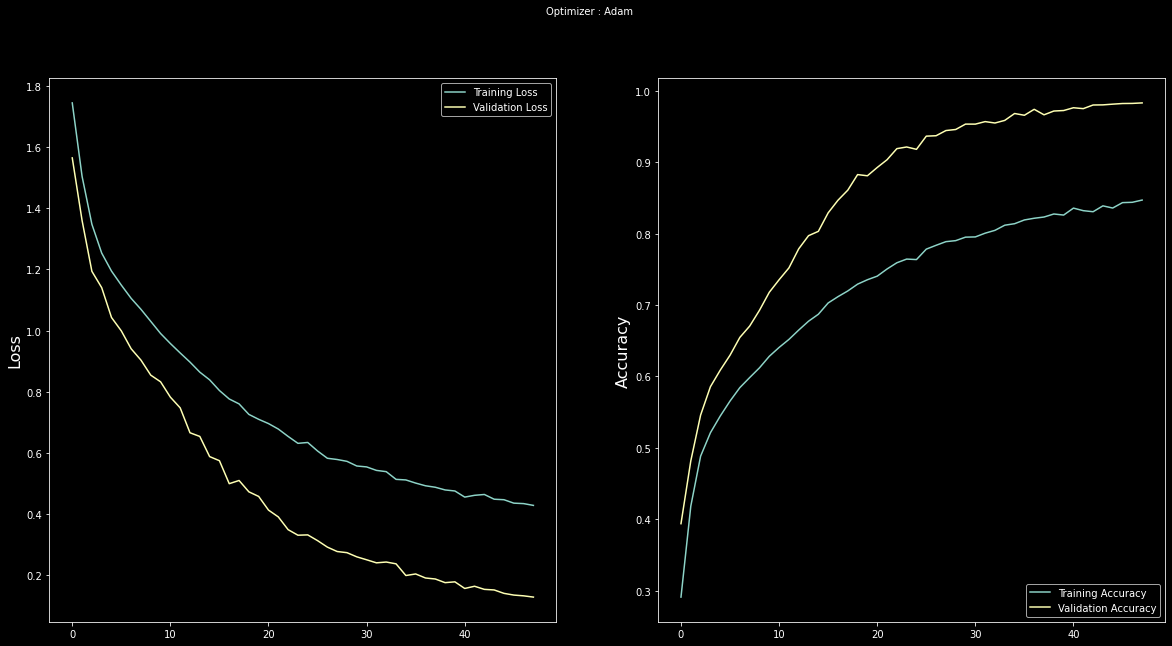

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()